# Summary

This work has been done to evaluate the method of 'Drop-connect' ("[Regularization of Neural Networks using DropConnect](http://cs.nyu.edu/~wanli/dropc/dropc.pdf)" - Li Wan, et-al).

In this part, I compare between 3 regularization techniques - None, L2, dropout, drop-connect. This is done using the **CIFAR-10 dataset**.

The intention here is not necessarily to get the best optimized net, but rather evaluate the different regularization methods.

The net architecture is as following:

* **2x Convolutional layers** (depth = 12, patch_size = 4, with padding) for feature extraction

* **2x Fully connected layers** - these layers will have regularization applied to

* **1x Softmax layer**

* **Optimization method used is adam**, which showed better performance over other tested.
    $$ m = beta1*m + (1‐beta1)*dx $$
    $$ v = beta2*v + (1‐beta2)*(dx^2) $$
    $$ x += ‐learningrate*m / (np.sqrt(v) + eps) $$


### Drop-connect Model
For a drop-connect layer, the output is given by: 

$$ r=a(u)=a((M∗W)v) $$ While:
* $v$ - output of the feature vector
* $W$ - Fully connected weight matrix
* $a$ - Nonlinear activation function
* $M$ - Binary matrix

The binary matrix is calculated using a Bernoulli distribution:
$$ M_ij ~ Bernoulli(p) $$

* While p is the 'keep' probablity

# Summary Plots

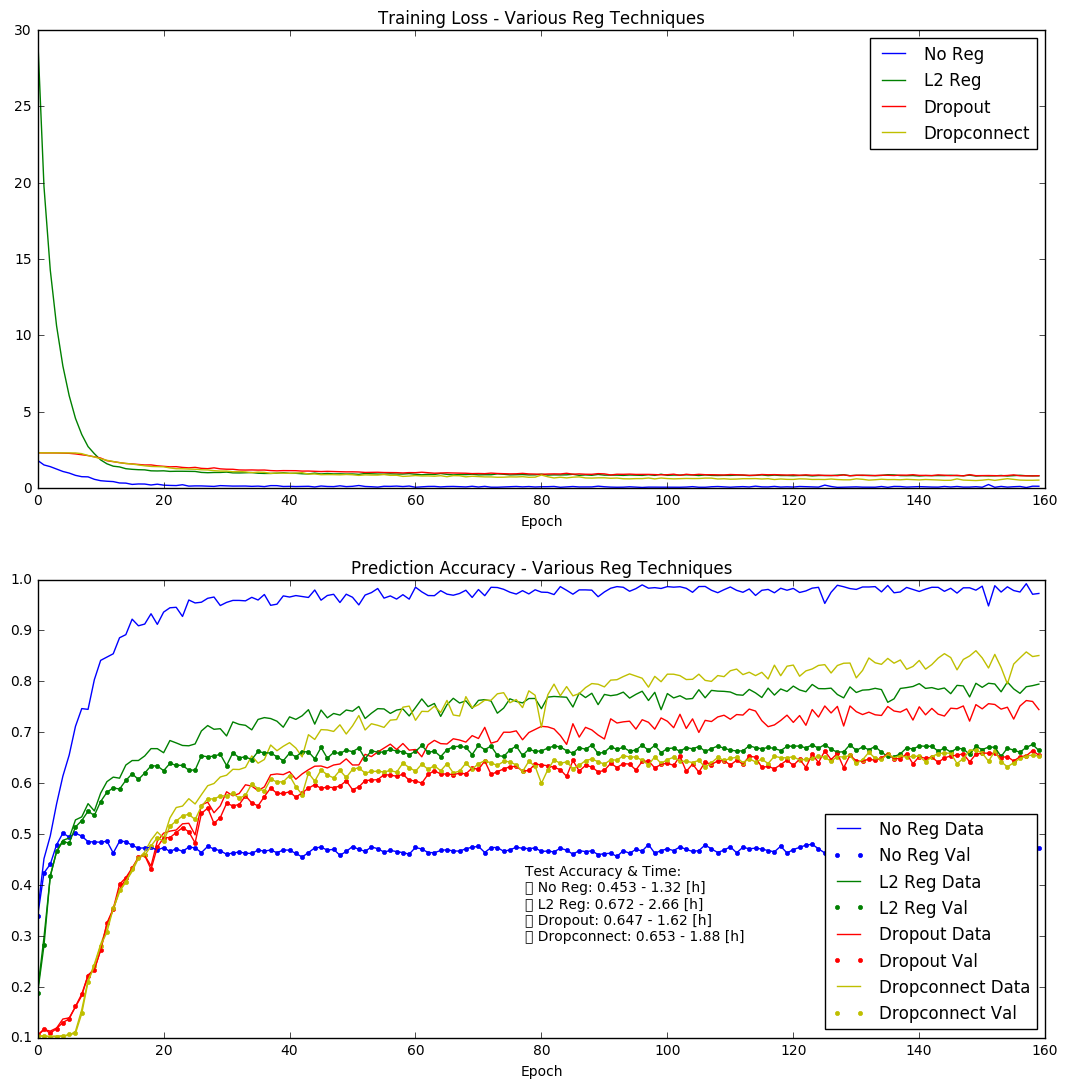

In [219]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.0, 13.0) 
plt.subplot(2,1,1)
plt.plot(loss_history_no_reg)
plt.plot(loss_history_l2_reg)
plt.plot(loss_history_dropout)
plt.plot(loss_history_dropcon, 'y')
plt.title('Training Loss - Various Reg Techniques')
plt.xlabel('Epoch')
plt.legend(['No Reg' ,'L2 Reg', 'Dropout', 'Dropconnect'])

plt.subplot(2,1,2)
plt.plot(data_predict_acc_hist_no_reg,'b')
plt.plot(valid_predict_acc_hist_no_reg,'.b')

plt.plot(data_predict_acc_hist_l2_reg,'g')
plt.plot(valid_predict_acc_hist_l2_reg,'.g')

plt.plot(data_predict_acc_hist_dropout,'r')
plt.plot(valid_predict_acc_hist_dropout,'.r')

plt.plot(data_predict_acc_hist_dropcon,'y')
plt.plot(valid_predict_acc_hist_dropcon,'.y')

plt.plot(valid_predict_acc_hist_no_reg,'b')
plt.plot(valid_predict_acc_hist_l2_reg,'g')
plt.plot(valid_predict_acc_hist_dropout,'r')
plt.plot(valid_predict_acc_hist_dropcon,'y')

plt.title('Prediction Accuracy - Various Reg Techniques')
plt.xlabel('Epoch')

plt.legend(['No Reg Data' , 'No Reg Val' ,'L2 Reg Data', 'L2 Reg Val', 'Dropout Data', 
            'Dropout Val' , 'Dropconnect Data', 'Dropconnect Val'], loc=4)
plt.figtext(0.5, 0.2, 'Test Accuracy & Time:\n\t No Reg: %.3f - %.2f [h]\n\t L2 Reg: %.3f - %.2f [h]\n\t Dropout: %.3f - %.2f [h]\n\t Dropconnect: %.3f - %.2f [h] ' % 
            (test_acc_no_reg, time_noreg/3600, test_acc_l2_reg, time_l2/3600, test_acc_dropout, time_dropout/3600, test_acc_dropcon, time_dropcon/3600))
plt.show()

<img src="keep_probs.PNG">

### Weight Visualization / Distribution

#### Layer 1 (Conv 1 [4, 4, 3, 12])

(4, 4, 3, 12)


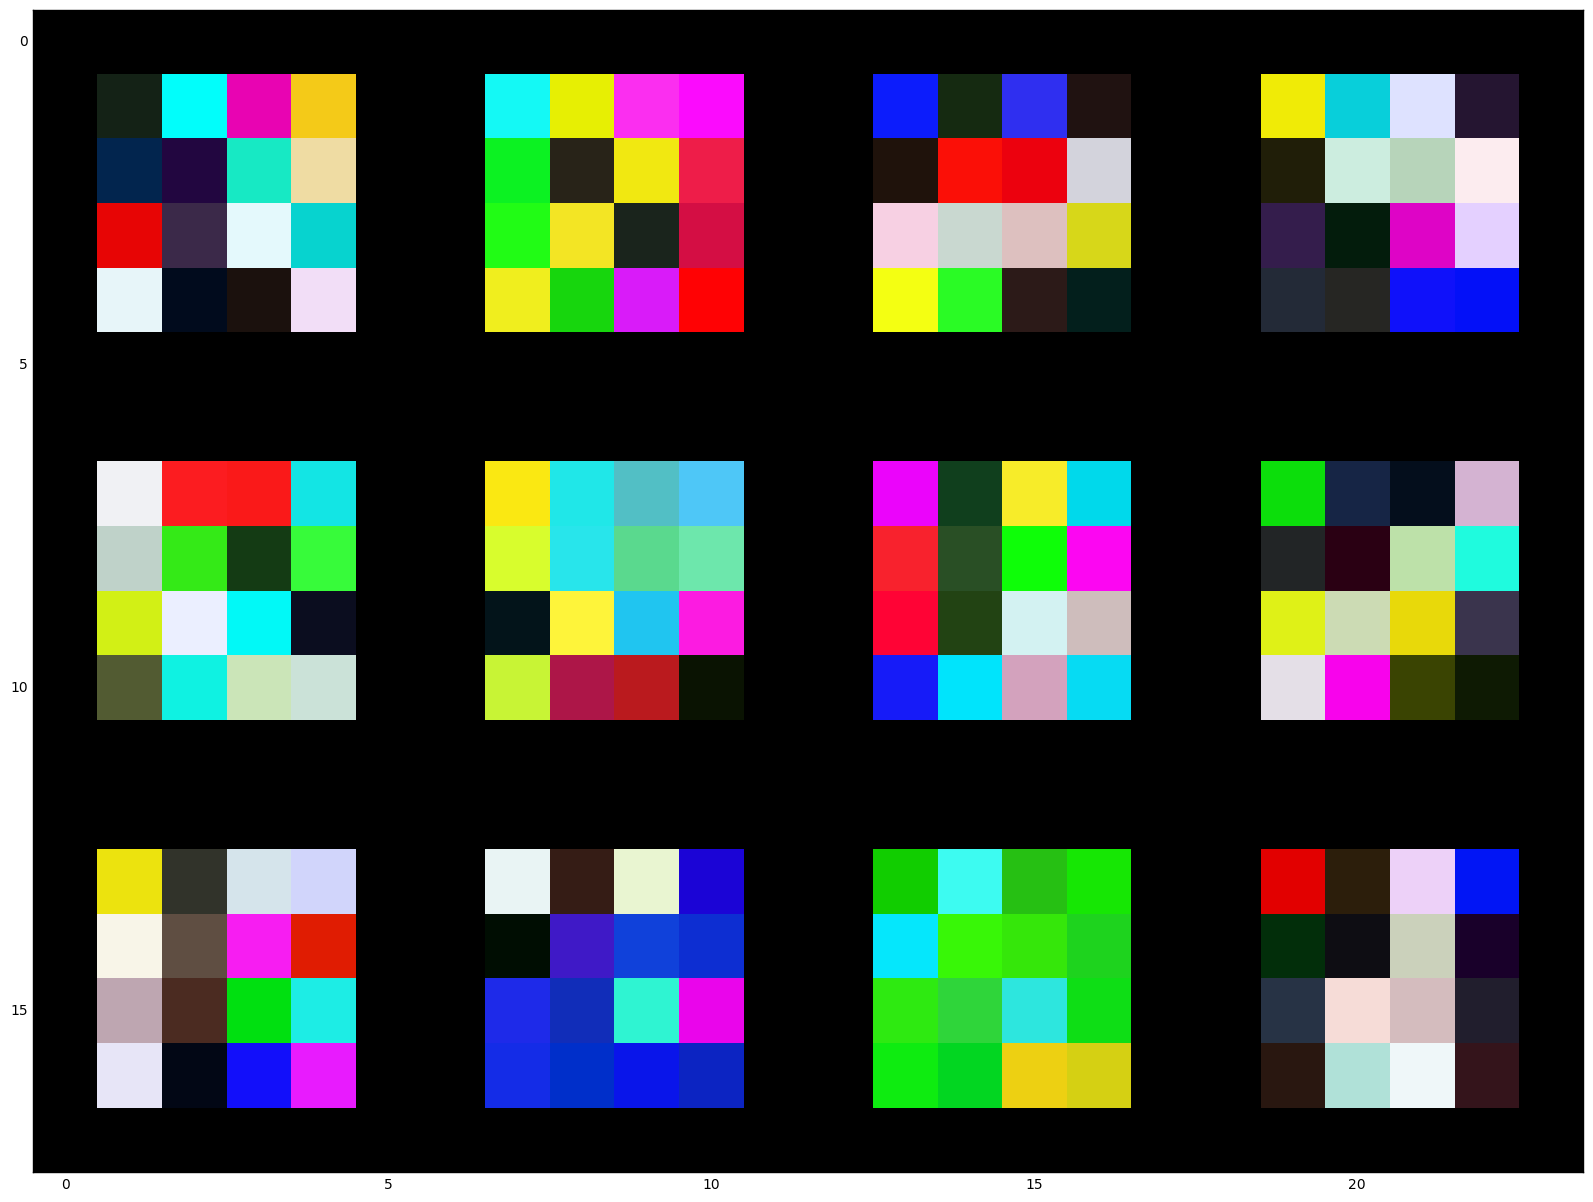

In [134]:
pad_len = 1
im_width = 4
im_height = 3
plt.rcParams['figure.figsize'] = (20.0, 30.0)
plt.rcParams['image.interpolation'] = 'nearest'
new_shape = w_1_l2.shape[1] + 2*pad_len
print (w_1_l2.shape)
w_1_l2_pad = np.zeros((im_height * new_shape, im_width * new_shape, w_1_l2.shape[2]))
for w_1_row_idx in range(im_height):
    for w_1_col_idx in range(im_width):
        curr_padded = np.pad(w_1_l2[:,:,:,im_width*w_1_row_idx + w_1_col_idx], ((pad_len,pad_len),(pad_len,pad_len),(0,0)), mode='constant')
        w_1_l2_pad[w_1_row_idx*new_shape:(w_1_row_idx + 1)*new_shape, w_1_col_idx*new_shape:(w_1_col_idx + 1)*new_shape, :] = curr_padded
plt.imshow(w_1_l2_pad)


#### Layer 2 (Conv 2 [4, 4, 12, 12])

(4, 4, 12, 12)
(18, 24, 12)
(60, 104)


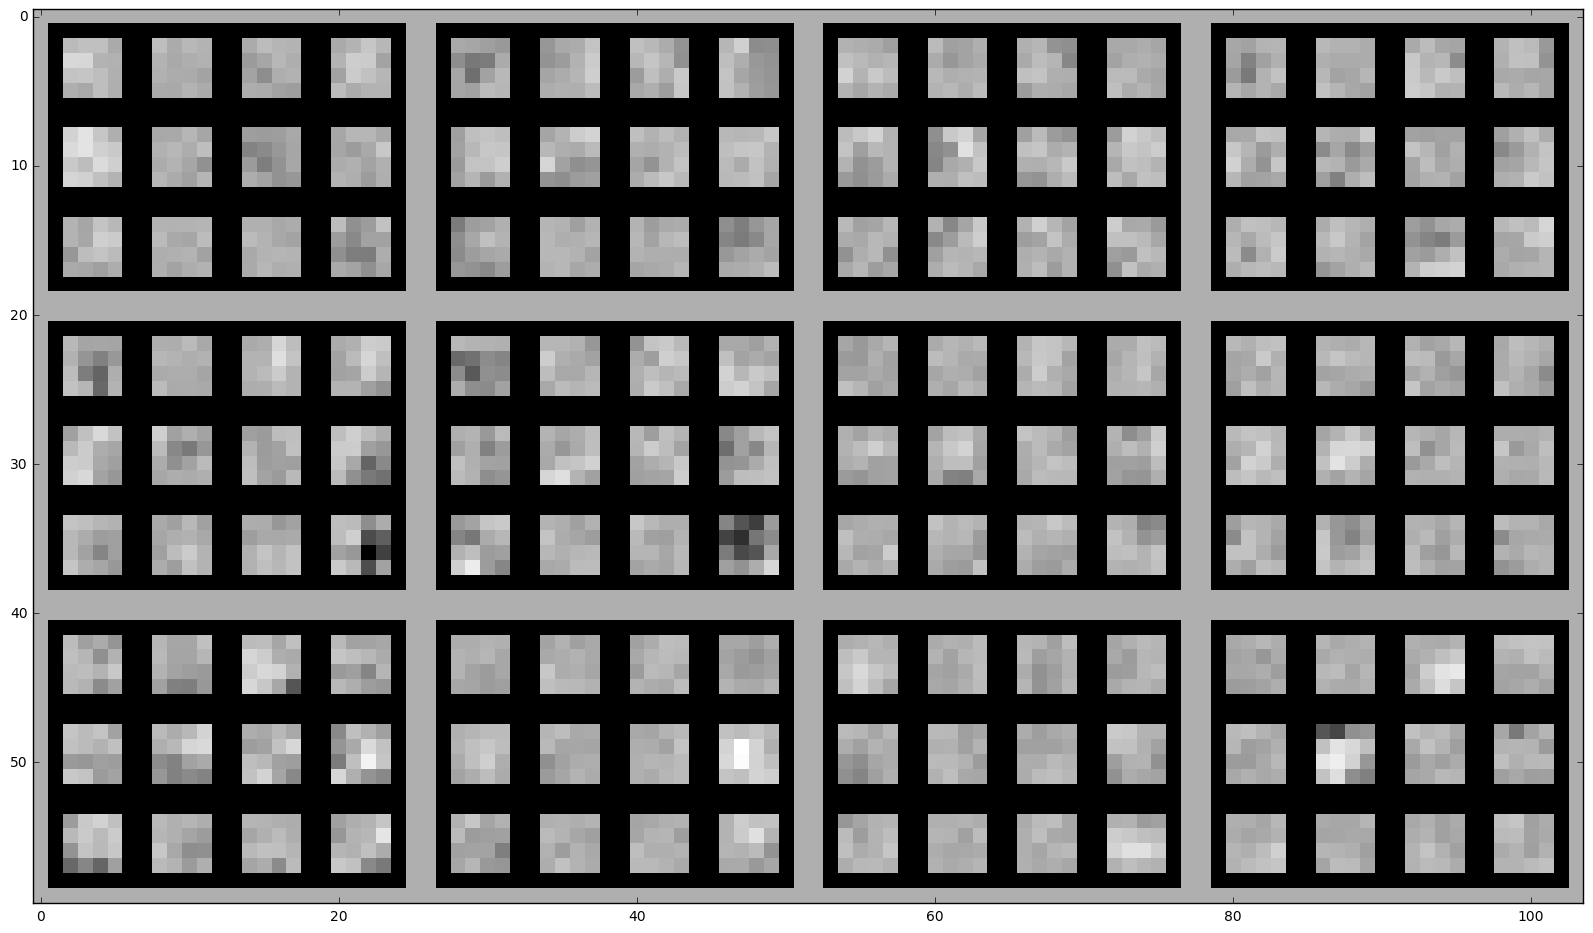

In [135]:
pad_len = 1
im_width = 4
im_height = 3
new_shape = (w_2_l2.shape[0] + 2*pad_len)
plt.rcParams['figure.figsize'] = (20.0, 30.0)
plt.rcParams['image.interpolation'] = 'nearest'
w_2_l2_pad = np.zeros((im_height * new_shape, im_width * new_shape, w_2_l2.shape[3]))
print (w_2_l2.shape)
print (w_2_l2_pad.shape)

for w_2_dim_idx in range(w_2_l2.shape[3]):
    for w_2_row_idx in range(im_height):
        for w_2_col_idx in range(im_width):
            curr_padded = np.pad(w_2_l2[:,:,im_width*w_2_row_idx + w_2_col_idx, w_2_dim_idx], ((pad_len,pad_len),(pad_len,pad_len)), mode='constant', constant_values=np.min(w_2_l2))
            w_2_l2_pad[w_2_row_idx*new_shape:(w_2_row_idx + 1)*new_shape, w_2_col_idx*new_shape:(w_2_col_idx + 1)*new_shape, w_2_dim_idx] = curr_padded

new_shape_row = (w_2_l2_pad.shape[0] + 2*pad_len)
new_shape_col = (w_2_l2_pad.shape[1] + 2*pad_len)
w_2_l2_pad_all = np.zeros((im_height * new_shape_row, im_width * new_shape_col))
print (w_2_l2_pad_all.shape)

for w_2_row_idx in range(im_height):
    for w_2_col_idx in range(im_width):
        curr_padded = np.pad(w_2_l2_pad[:,:,im_width*w_2_row_idx + w_2_col_idx], ((pad_len,pad_len),(pad_len,pad_len)), mode='constant')
        w_2_l2_pad_all[w_2_row_idx*new_shape_row:(w_2_row_idx + 1)*new_shape_row, w_2_col_idx*new_shape_col:(w_2_col_idx + 1)*new_shape_col] = curr_padded
            
            
plt.imshow(w_2_l2_pad_all, cmap='gray')


#### Layer 3 (FC 1 + L2 [768, 256])

(-0.5, 4.5)

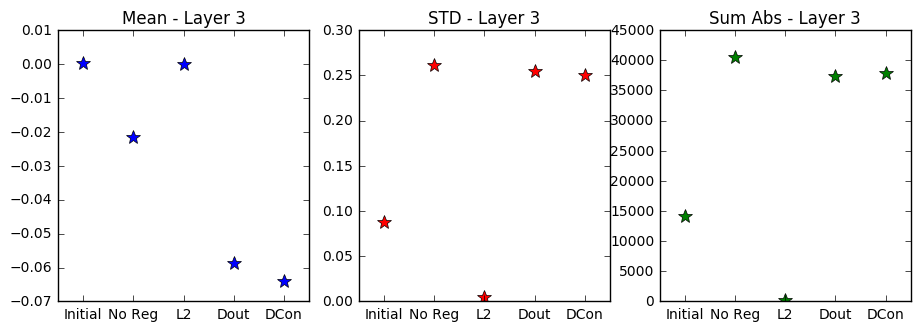

In [130]:
mean_std_3 = np.zeros((3,5), dtype=float)
mean_std_3[:,0] = np.mean(w_3_initial[:,:]) , np.std(w_3_initial[:,:]) , np.sum(np.abs(w_3_initial[:,:]))
mean_std_3[:,1] = np.mean(w_3_noreg[:,:]) , np.std(w_3_noreg[:,:]) ,  np.sum(np.abs(w_3_noreg[:,:]))
mean_std_3[:,2] = np.mean(w_3_l2[:,:]) , np.std(w_3_l2[:,:]) ,  np.sum(np.abs(w_3_l2[:,:]))
mean_std_3[:,3] = np.mean(w_3_dropout[:,:]) , np.std(w_3_dropout[:,:]) ,  np.sum(np.abs(w_3_dropout[:,:]))
mean_std_3[:,4] = np.mean(w_3_dropcon[:,:]) , np.std(w_3_dropcon[:,:]) ,  np.sum(np.abs(w_3_dropcon[:,:]))
plt.rcParams['figure.figsize'] = (11.0, 3.5)
plt.subplot(1,3,1)
plt.plot(mean_std_3[0,:],'*b',markersize=10)
plt.title('Mean - Layer 3')
plt.xticks(range(0,5), ['Initial','No Reg','L2','Dout','DCon'])
plt.xlim(-0.5,4.5)
plt.subplot(1,3,2)
plt.plot(mean_std_3[1,:],'*r',markersize=10)
plt.title('STD - Layer 3')
plt.xticks(range(0,5), ['Initial','No Reg','L2','Dout','DCon'])
plt.xlim(-0.5,4.5)
plt.subplot(1,3,3)
plt.plot(mean_std_3[2,:],'*g',markersize=10)
plt.title('Sum Abs - Layer 3')
plt.xticks(range(0,5), ['Initial','No Reg','L2','Dout','DCon'])
plt.xlim(-0.5,4.5)

(-1.0, 1.0)

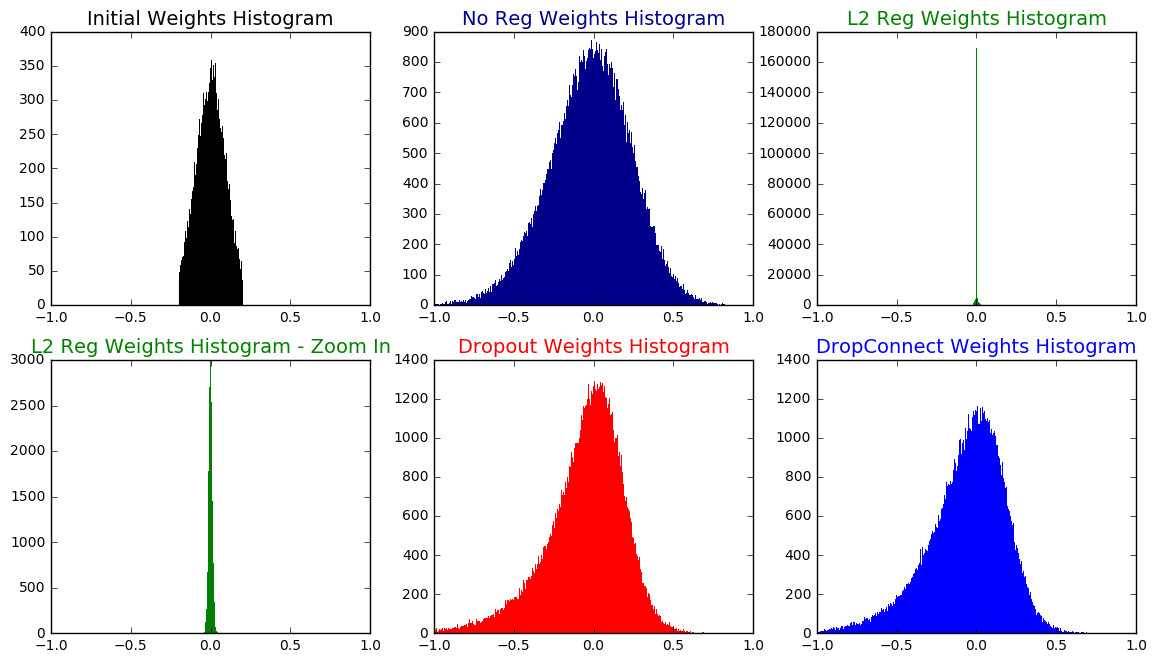

In [213]:
x_lim = 1.0

plt.rcParams['figure.figsize'] = (14.0, 12.0)
plt.subplot(3,3,1)
plt.xlim([-x_lim,x_lim])
_ = plt.hist(np.concatenate(w_3_initial),bins=1000,color='black',edgecolor='none')
plt.title('Initial Weights Histogram', fontsize=14)
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,2)
_ = plt.hist(np.concatenate(w_3_noreg),bins=1000,color='darkblue',edgecolor='none')
plt.title('No Reg Weights Histogram',fontsize=14,color='darkblue')
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,3)
_ = plt.hist(np.concatenate(w_3_l2),bins=30,color='green',edgecolor='none')
plt.title('L2 Reg Weights Histogram',fontsize=14,color='green')
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,4)
_ = plt.hist(np.concatenate(w_3_l2),bins=50,color='green',edgecolor='none')
plt.title('L2 Reg Weights Histogram - Zoom In',fontsize=14,color='green')
plt.xlim([-x_lim,x_lim])
plt.ylim([0,3000])
plt.subplot(3,3,5)
_ = plt.hist(np.concatenate(w_3_dropout),bins=1000,color='red',edgecolor='none')
plt.title('Dropout Weights Histogram',fontsize=14,color='red')
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,6)
_ = plt.hist(np.concatenate(w_3_dropcon),bins=1000,color='blue',edgecolor='none')
plt.title('DropConnect Weights Histogram',fontsize=14,color='blue')
plt.xlim([-x_lim,x_lim])

Initial:  -0.199988 0.199997
No Reg:  -1.51567 1.19586
L2 Reg:  -0.0783233 0.0568575
Dropout:  -2.03283 1.26452
DropCon:  -1.91593 1.16736
_________________

Layer 3 (768, 256):
_________________


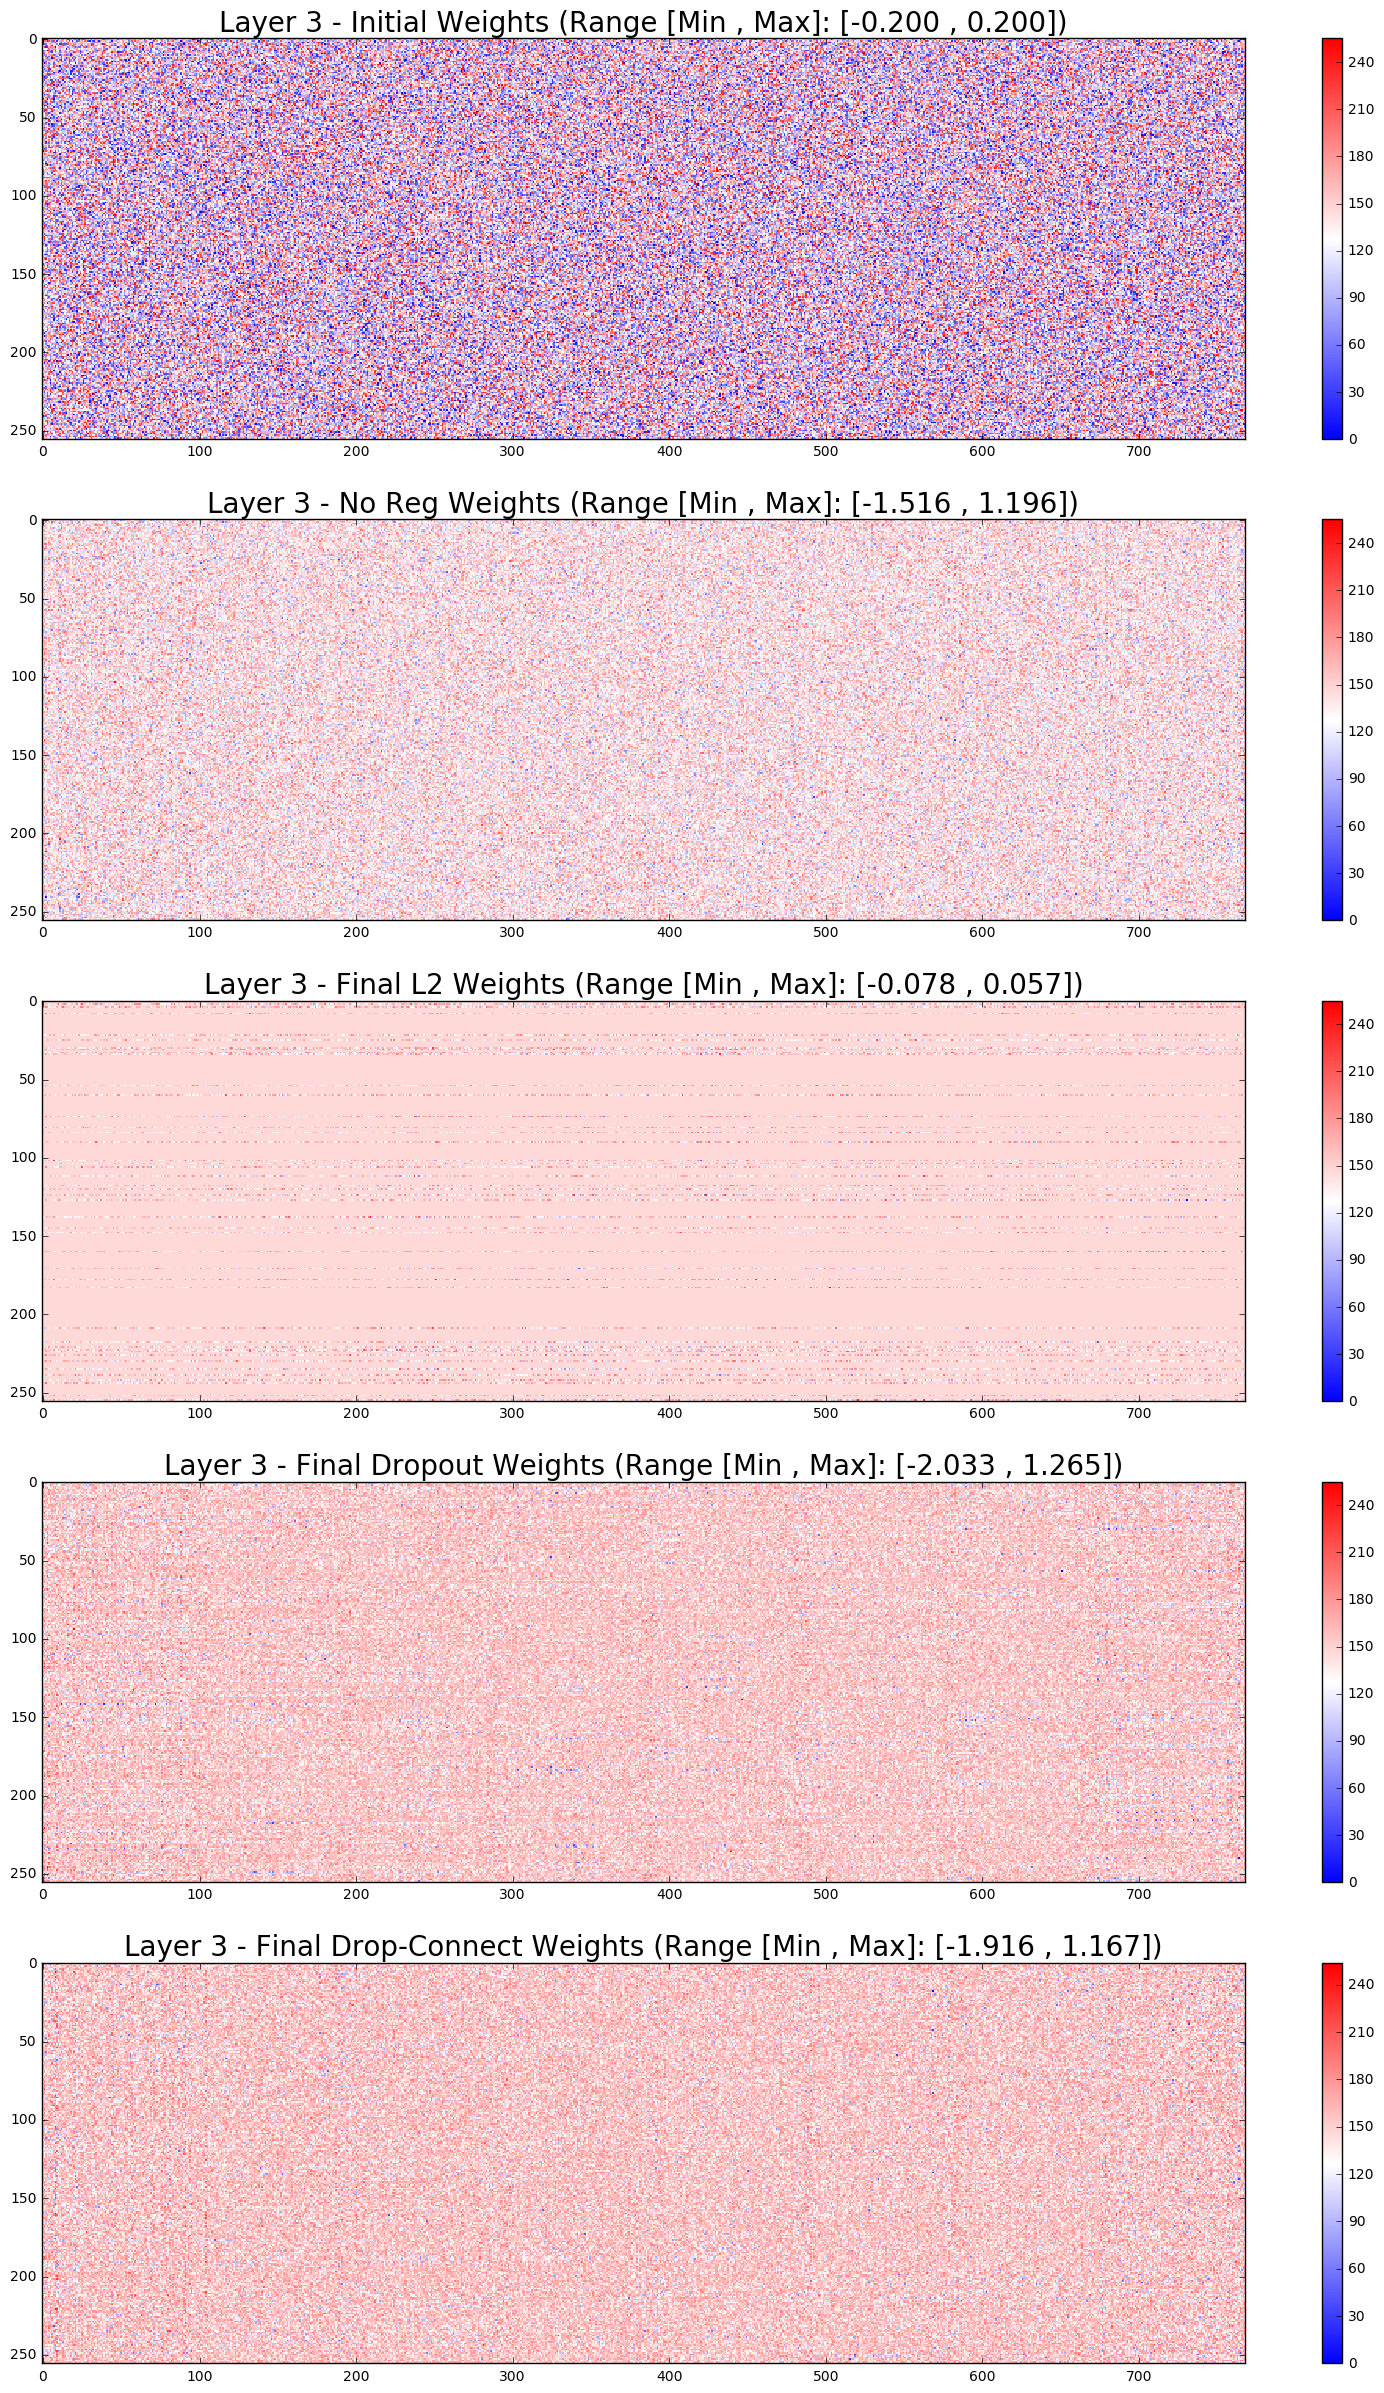

In [131]:
w_3_min_in, w_3_max_in = np.min(w_3_initial), np.max(w_3_initial)
w_3_min_noreg, w_3_max_noreg = np.min(w_3_noreg), np.max(w_3_noreg)
w_3_min_l2, w_3_max_l2 = np.min(w_3_l2), np.max(w_3_l2)
w_3_min_dropcon, w_3_max_dropcon = np.min(w_3_dropcon), np.max(w_3_dropcon)
w_3_min_dropout, w_3_max_dropout = np.min(w_3_dropout), np.max(w_3_dropout)

print ('Initial: ', w_3_min_in, w_3_max_in)
print ('No Reg: ', w_3_min_noreg, w_3_max_noreg)
print ('L2 Reg: ', w_3_min_l2, w_3_max_l2)
print ('Dropout: ', w_3_min_dropout, w_3_max_dropout)
print ('DropCon: ', w_3_min_dropcon, w_3_max_dropcon)


print ('_________________\n')
print ('Layer 3 (768, 256):')
print ('_________________')
plt.rcParams['figure.figsize'] = (20.0, 30.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.subplot(5, 1, 1)

wimg = 255.0 * (w_3_initial[ :, :].squeeze() - w_3_min_in) / (w_3_max_in - w_3_min_in)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 3 - Initial Weights (Range [Min , Max]: [%.3f , %.3f])' % (w_3_min_in, w_3_max_in), fontsize=20)
plt.colorbar()

plt.subplot(5, 1, 2)
wimg = 255.0 * (w_3_noreg[ :, :].squeeze() - w_3_min_noreg) / (w_3_max_noreg - w_3_min_noreg)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 3 - No Reg Weights (Range [Min , Max]: [%.3f , %.3f])' % (w_3_min_noreg, w_3_max_noreg),fontsize=20)
plt.colorbar()

plt.subplot(5, 1, 3)
wimg = 255.0 * (w_3_l2[ :, :].squeeze() - w_3_min_l2) / (w_3_max_l2 - w_3_min_l2)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 3 - Final L2 Weights (Range [Min , Max]: [%.3f , %.3f])' % (w_3_min_l2, w_3_max_l2), fontsize=20)
plt.colorbar()

plt.subplot(5, 1, 4)
wimg = 255.0 * (w_3_dropout[ :, :].squeeze() - w_3_min_dropout) / (w_3_max_dropout - w_3_min_dropout)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 3 - Final Dropout Weights (Range [Min , Max]: [%.3f , %.3f])' % (w_3_min_dropout, w_3_max_dropout), fontsize=20)
plt.colorbar()

plt.subplot(5, 1, 5)
wimg = 255.0 * (w_3_dropcon[ :, :].squeeze() - w_3_min_dropcon) / (w_3_max_dropcon - w_3_min_dropcon)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 3 - Final Drop-Connect Weights (Range [Min , Max]: [%.3f , %.3f])' % (w_3_min_dropcon, w_3_max_dropcon), fontsize=20)
plt.colorbar()


#### Layer 4 (FC 2 + L2 [256, 64])

(-0.5, 4.5)

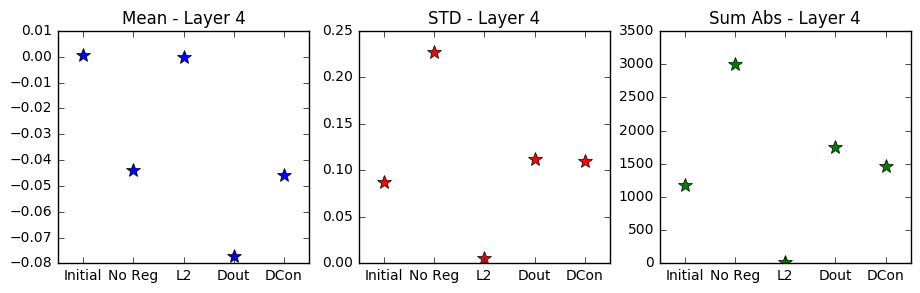

In [136]:
mean_std_4 = np.zeros((3,5), dtype=float)
mean_std_4[:,0] = np.mean(w_4_initial[:,:]) , np.std(w_4_initial[:,:]) , np.sum(np.abs(w_4_initial[:,:]))
mean_std_4[:,1] = np.mean(w_4_noreg[:,:]) , np.std(w_4_noreg[:,:]) ,  np.sum(np.abs(w_4_noreg[:,:]))
mean_std_4[:,2] = np.mean(w_4_l2[:,:]) , np.std(w_4_l2[:,:]) ,  np.sum(np.abs(w_4_l2[:,:]))
mean_std_4[:,3] = np.mean(w_4_dropout[:,:]) , np.std(w_4_dropout[:,:]) ,  np.sum(np.abs(w_4_dropout[:,:]))
mean_std_4[:,4] = np.mean(w_4_dropcon[:,:]) , np.std(w_4_dropcon[:,:]) ,  np.sum(np.abs(w_4_dropcon[:,:]))
plt.rcParams['figure.figsize'] = (11.0, 3.0)
plt.subplot(1,3,1)
plt.plot(mean_std_4[0,:],'*b',markersize=10)
plt.title('Mean - Layer 4')
plt.xticks(range(0,5), ['Initial','No Reg','L2','Dout','DCon'])
plt.xlim(-0.5,4.5)
plt.subplot(1,3,2)
plt.plot(mean_std_4[1,:],'*r',markersize=10)
plt.title('STD - Layer 4')
plt.xticks(range(0,5), ['Initial','No Reg','L2','Dout','DCon'])
plt.xlim(-0.5,4.5)
plt.subplot(1,3,3)
plt.plot(mean_std_4[2,:],'*g',markersize=10)
plt.title('Sum Abs - Layer 4')
plt.xticks(range(0,5), ['Initial','No Reg','L2','Dout','DCon'])
plt.xlim(-0.5,4.5)

(-0.5, 0.5)

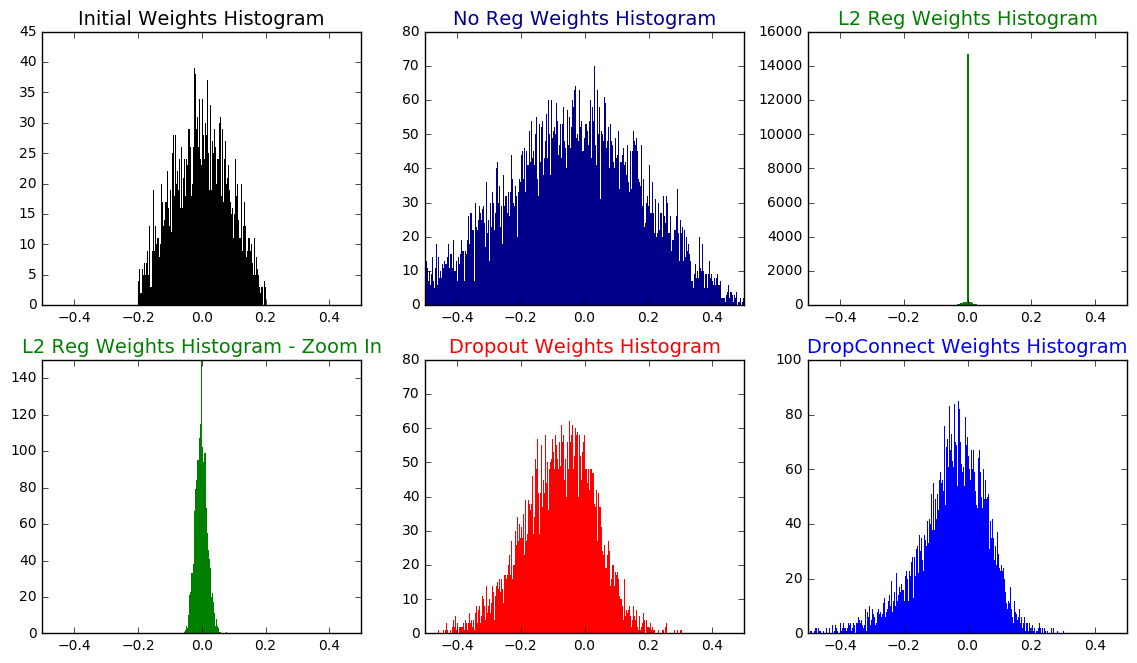

In [217]:
x_lim = 0.5

plt.rcParams['figure.figsize'] = (14.0, 12.0)
plt.subplot(3,3,1)
plt.xlim([-x_lim,x_lim])
_ = plt.hist(np.concatenate(w_4_initial),bins=1000,color='black',edgecolor='none')
plt.title('Initial Weights Histogram', fontsize=14)
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,2)
_ = plt.hist(np.concatenate(w_4_noreg),bins=1000,color='darkblue',edgecolor='none')
plt.title('No Reg Weights Histogram',fontsize=14,color='darkblue')
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,3)
_ = plt.hist(np.concatenate(w_4_l2),bins=30,color='green',edgecolor='none')
plt.title('L2 Reg Weights Histogram',fontsize=14,color='green')
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,4)
_ = plt.hist(np.concatenate(w_4_l2),bins=50,color='green',edgecolor='none')
plt.title('L2 Reg Weights Histogram - Zoom In',fontsize=14,color='green')
plt.xlim([-x_lim,x_lim])
plt.ylim([0,150])
plt.subplot(3,3,5)
_ = plt.hist(np.concatenate(w_4_dropout),bins=1000,color='red',edgecolor='none')
plt.title('Dropout Weights Histogram',fontsize=14,color='red')
plt.xlim([-x_lim,x_lim])
plt.subplot(3,3,6)
_ = plt.hist(np.concatenate(w_4_dropcon),bins=1000,color='blue',edgecolor='none')
plt.title('DropConnect Weights Histogram',fontsize=14,color='blue')
plt.xlim([-x_lim,x_lim])

_________________

Layer 4 (256, 64):
_________________


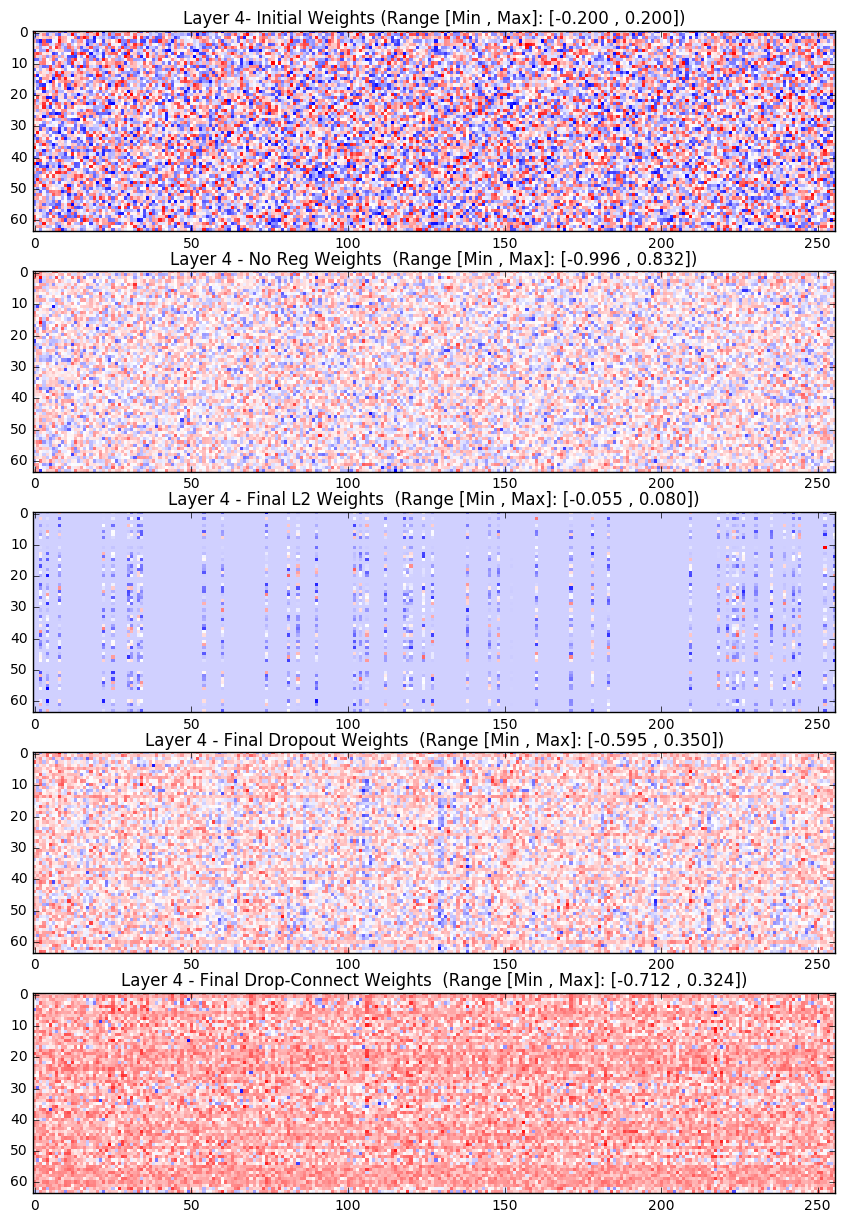

In [137]:
w_4_min_in, w_4_max_in = np.min(w_4_initial), np.max(w_4_initial)
w_4_min_noreg, w_4_max_noreg = np.min(w_4_noreg), np.max(w_4_noreg)
w_4_min_l2, w_4_max_l2 = np.min(w_4_l2), np.max(w_4_l2)
w_4_min_dropcon, w_4_max_dropcon = np.min(w_4_dropcon), np.max(w_4_dropcon)
w_4_min_dropout, w_4_max_dropout = np.min(w_4_dropout), np.max(w_4_dropout)


print ('_________________\n')
print ('Layer 4 (256, 64):')
print ('_________________')
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.subplot(5, 1, 1)
wimg = 255.0 * (w_4_initial[ :, :].squeeze() - w_4_min_in) / (w_4_max_in - w_4_min_in)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 4- Initial Weights (Range [Min , Max]: [%.3f , %.3f])' % (w_4_min_in, w_4_max_in))

plt.subplot(5, 1, 2)
wimg = 255.0 * (w_4_noreg[ :, :].squeeze() - w_4_min_noreg) / (w_4_max_noreg - w_4_min_noreg)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 4 - No Reg Weights  (Range [Min , Max]: [%.3f , %.3f])' % (w_4_min_noreg, w_4_max_noreg))

plt.subplot(5, 1, 3)
wimg = 255.0 * (w_4_l2[ :, :].squeeze() - w_4_min_l2) / (w_4_max_l2 - w_4_min_l2)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 4 - Final L2 Weights  (Range [Min , Max]: [%.3f , %.3f])' % (w_4_min_l2, w_4_max_l2))

plt.subplot(5, 1, 4)
wimg = 255.0 * (w_4_dropout[ :, :].squeeze() - w_4_min_dropout) / (w_4_max_dropout - w_4_min_dropout)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 4 - Final Dropout Weights  (Range [Min , Max]: [%.3f , %.3f])' % (w_4_min_dropout, w_4_max_dropout))

plt.subplot(5, 1, 5)
wimg = 255.0 * (w_4_dropcon[ :, :].squeeze() - w_4_min_dropcon) / (w_4_max_dropcon - w_4_min_dropcon)
plt.imshow(np.transpose(wimg.astype('uint8')), cmap='bwr')
plt.axis('on')
plt.title('Layer 4 - Final Drop-Connect Weights  (Range [Min , Max]: [%.3f , %.3f])' % (w_4_min_dropcon, w_4_max_dropcon))

#### Layer 5 (FC 1 [64, 10])

Layer 5:
_______


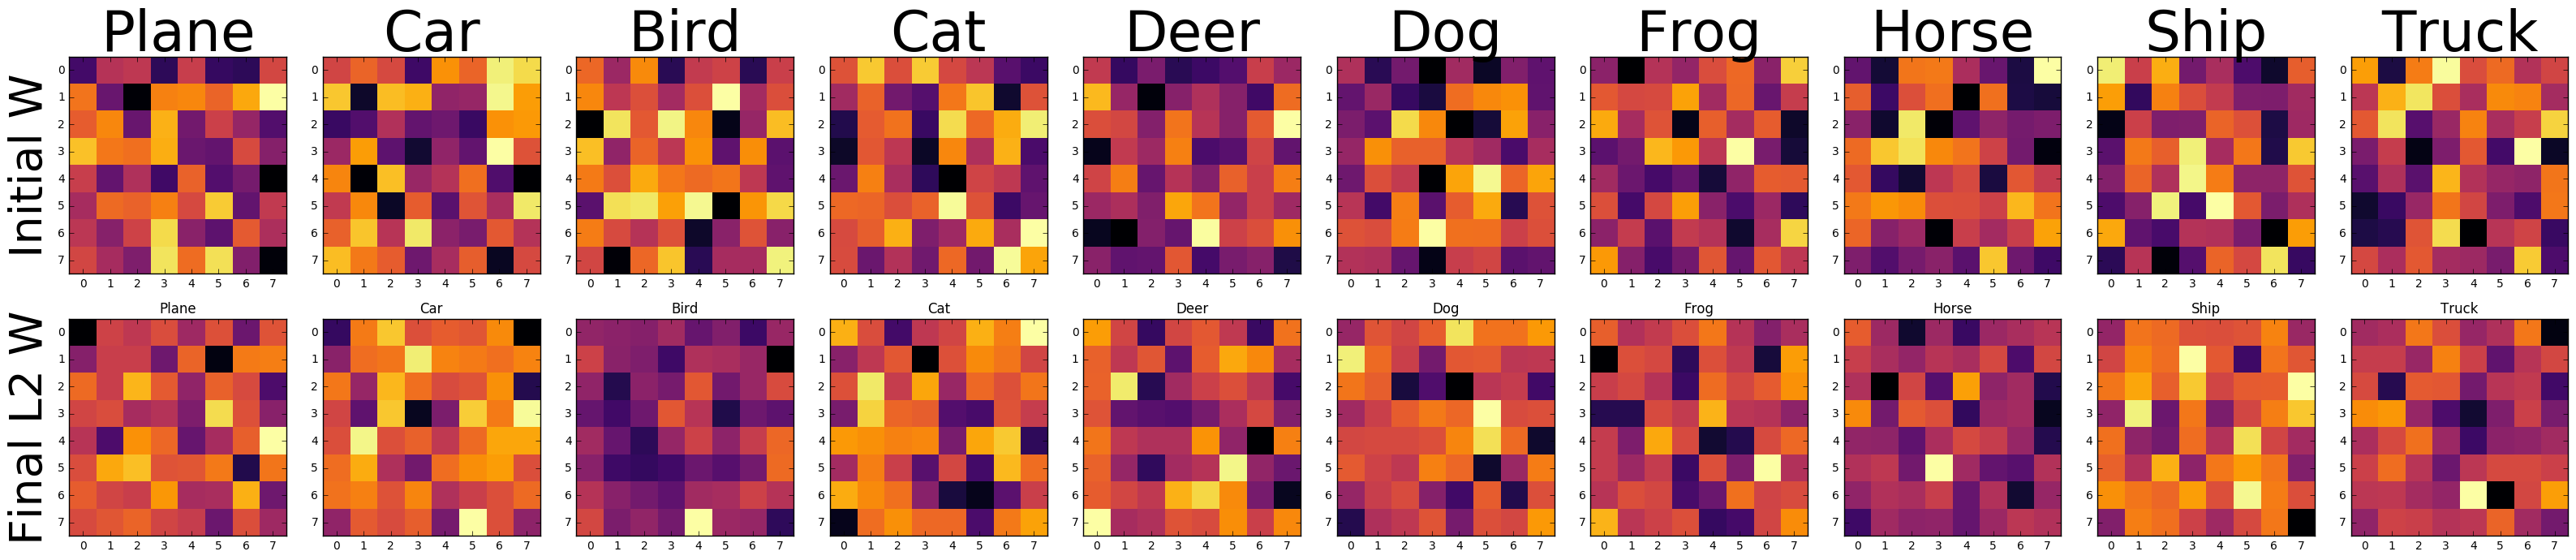

In [218]:
w_5_min_in, w_5_max_in = np.min(w_5_initial), np.max(w_5_initial)
w_5_min_l2, w_5_max_l2 = np.min(w_5_l2), np.max(w_5_l2)

classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print ('Layer 5:')
print ('_______')
plt.rcParams['figure.figsize'] = (32.0, 7.0)
plt.rcParams['image.interpolation'] = 'nearest'
for i in range(num_classes):
    plt.subplot(2, 10, i + 1)
    wimg = 255.0 * (w_5_initial[ :, :, i].squeeze() - w_5_min_in) / (w_5_max_in - w_5_min_in)
    plt.tight_layout()
    plt.imshow(wimg.astype('uint8'), cmap='inferno')
    #plt.imshow(wimg.astype('uint8'), cmap='bwr')
    plt.axis('on')
    plt.title(classes[i], fontsize=50)
    if i == 0:
        plt.ylabel('Initial W', fontsize='40')
    plt.subplot(2, 10, i + 11)
    wimg = 255.0 * (w_5_l2[ :, :, i].squeeze() - w_5_min_l2) / (w_5_max_l2 - w_5_min_l2)
    plt.title(classes[i])
    plt.tight_layout()
    plt.imshow(wimg.astype('uint8'), cmap='inferno')
    #plt.imshow(wimg.astype('uint8'), cmap='bwr')
    if i == 0:
        plt.ylabel('Final L2 W', fontsize='40')

In [17]:
## Initial

# L5
w = network.all_params[8].eval() # Done once per notebook
w_size = np.int(np.round(np.sqrt(w.shape[0])))
w_5_initial = w.reshape(w_size, w_size, num_classes)

# L4
w = network.all_params[6].eval() # Done once per notebook
w_4_initial = w.reshape(w.shape[0], w.shape[1])

# L3
w = network.all_params[4].eval() # Done once per notebook
w_3_initial = w.reshape(w.shape[0], w.shape[1])

# L2
w = network.all_params[2].eval() # Done once per notebook
w_2_initial = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])

# L1
w = network.all_params[0].eval() # Done once per notebook
w_1_initial = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])

In [74]:
print (network)


It is a Layer class
  param   0: (4, 4, 3, 12)      cnn_layer_1_l2_28/W_conv2d:0
  param   1: (12,)              cnn_layer_1_l2_28/b_conv2d:0
  param   2: (4, 4, 12, 12)     cnn_layer_2_l2_28/W_conv2d:0
  param   3: (12,)              cnn_layer_2_l2_28/b_conv2d:0
  param   4: (768, 256)         relu_1_l2_28/W:0
  param   5: (256,)             relu_1_l2_28/b:0
  param   6: (256, 64)          relu_2_l2_28/W:0
  param   7: (64,)              relu_2_l2_28/b:0
  param   8: (64, 10)           output_layer_l2_28/W:0
  param   9: (10,)              output_layer_l2_28/b:0
  num of params: 216866
  layer 0: Tensor("cnn_layer_1_l2_28/Relu:0", shape=(128, 16, 16, 12), dtype=float32)
  layer 1: Tensor("cnn_layer_2_l2_28/Relu:0", shape=(128, 8, 8, 12), dtype=float32)
  layer 2: Tensor("flatten_layer_l2_28:0", shape=(128, 768), dtype=float32)
  layer 3: Tensor("relu_1_l2_28/Relu:0", shape=(128, 256), dtype=float32)
  layer 4: Tensor("relu_2_l2_28/Relu:0", shape=(128, 64), dtype=float32)
  layer 5: T

### Modules Import

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import tarfile, gzip, pickle
import tensorflow as tf
import tensorlayer as tl
import time
from IPython.display import display, Image
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

count_name = 1

# CIFAR-10 Dataset

### Download & Extract Data


In [7]:
url = 'https://www.cs.toronto.edu/~kriz/'

def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    if force or not os.path.exists(filename):
        filename, _ = urlretrieve(url + filename, filename)
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', filename)
    else:
        raise Exception(
          'Failed to verify ' + filename + '.')
    return filename

temp_filename = maybe_download('cifar-10-python.tar.gz', 170498071)


Found and verified cifar-10-python.tar.gz


In [8]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall()
        tar.close()
    data_folder = 'cifar-10-batches-py'
    print(data_folder)
    return data_folder
  
def unpickle(file):
    #import Pickle
    fo = open(file, 'rb')
    dict = Pickle.load(fo)
    fo.close()
    return dict
    
cifar_data_folder = maybe_extract(temp_filename)


Extracting data for cifar-10-python. Please wait.
cifar-10-batches-py


In [224]:
def load_cifar_batches (filename):
    with open(filename, 'rb') as cb:
        data_dict = pickle.load(cb, encoding='latin1')
        X = data_dict['data']
        Y = data_dict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')  # Not for TF use
        X = X.reshape(10000, 3072)
        Y = np.array(Y)
    return X, Y

def load_all_cifar (cifar_data_folder):
    data_app = []
    label_app = []  
    for batch in range(1,6): 
        current_batch = os.path.join(cifar_data_folder, 'data_batch_%d' % (batch, ))
        X, Y = load_cifar_batches(current_batch)
        data_app.append(X)
        label_app.append(Y)
    cifar_data = np.concatenate(data_app)
    cifar_labels = np.concatenate(label_app)

    return cifar_data, cifar_labels

cifar_data_folder = 'cifar-10-batches-py'
cifar_data_conc, cifar_labels_conc = load_all_cifar(cifar_data_folder)
 

cifar_test_file = os.path.join(cifar_data_folder, 'test_batch')
cifar_test_data, cifar_test_labels = load_cifar_batches(cifar_test_file)

print ('Data size: ' + str(cifar_data_conc.shape))
print ('Labels size: ' + str(cifar_labels_conc.shape))

#cifar_valid_data = cifar_test_data[:cifar_test_data.shape[0]/2, :, :, :] # Not for TF use
cifar_valid_data = cifar_test_data[:round(cifar_test_data.shape[0]/2), :]
print ('Validation data size: ' + str(cifar_valid_data.shape))

cifar_valid_labels = cifar_test_labels[:round(cifar_test_labels.shape[0]/2)] 
print ('Validation labels size: ' + str(cifar_valid_labels.shape))


#cifar_test_data = cifar_test_data[cifar_test_data.shape[0]/2:, :, :, :] # Not for TF use
cifar_test_data = cifar_test_data[round(cifar_test_data.shape[0]/2):, :]
print ('Test Data size: ' + str(cifar_valid_data.shape))

cifar_test_labels = cifar_test_labels[round(cifar_test_labels.shape[0]/2):] 
print ('Test labels size: ' + str(cifar_test_labels.shape))

#del cifar_data_conc, cifar_labels_conc, cifar_test_data,cifar_test_labels # For memory allocation

Data size: (50000, 3072)
Labels size: (50000,)
Validation data size: (5000, 3072)
Validation labels size: (5000,)
Test Data size: (5000, 3072)
Test labels size: (5000,)


### Convert to TF

In [225]:
image_size = (32)
num_labels = 10
num_channels = 3 # RGB

def reformat(dataset, labels):
    dataset = dataset.reshape(
        (-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
X_train, y_train = reformat(cifar_data_conc, cifar_labels_conc)
X_val, y_val = reformat(cifar_valid_data, cifar_valid_labels)
X_test, y_test = reformat(cifar_test_data, cifar_test_labels)
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

del cifar_data_conc, cifar_labels_conc, cifar_test_data,cifar_test_labels # For memory allocation


Training set (50000, 32, 32, 3) (50000, 10)
Validation set (5000, 32, 32, 3) (5000, 10)
Test set (5000, 32, 32, 3) (5000, 10)


### Display a Random Image as a Sanity Check


(32, 32, 3)


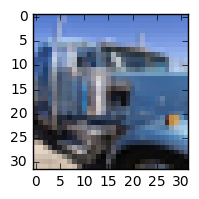

In [226]:
sample_idx = np.random.randint(len(X_train))  # pick a random image index
sample_image = X_train[sample_idx, :]  # extract a 2D slice
print (sample_image.shape)
%matplotlib inline
plt.rcParams['figure.figsize'] = (2.0, 8.0) # set the default size for plots
plt.figure()
plt.imshow(sample_image.astype('uint8'))  # display

## Network Parameters

In [227]:
# General hyper-parmeters
n_epoch = 160
batch_size = 128

# Adam Optimizer
    # m = beta1*m + (1‐beta1)*dx
    # v = beta2*v + (1‐beta2)*(dx**2)
    # x += ‐ learning_rate * m / (np.sqrt(v) + eps)

learning_rate = 0.001 
learning_rate_l2 = 0.0005
beta1_adam = 0.9
beta2_adam = 0.999
eps_adam = 1e-8 

# Conv layers hyper-parameters
patch_size = 4
depth = 12

# Dense/drop layers hyper-parameters
#num_hidden1 = 64
num_hidden1 = 256
#num_hidden2 = 32
num_hidden2 = 64
keep_prob = 0.5


# L2

l2_reg = 0.08


# Constant parameters
im_height = 32
im_width = 32
num_classes = y_train.shape[1]
print_freq = 40

###  No Regularization: 2x CNN - Feature Extractor / 2x Fully Connected Layer / 1x Softmax Layer

In [19]:
# Workaround for layer naming
count_name = count_name + 1 
add_name = str(count_name)

# Convert to an array
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int64)
X_val = np.asarray(X_val, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.int64)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int64)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_val.shape', X_val.shape)
print('y_val.shape', y_val.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)
print('\n')

# Model declaration
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[batch_size, im_height, im_width, num_channels])   # [batch_size, height, width, channels]
y_ = tf.placeholder(tf.int64, shape=[batch_size, num_classes])

start_time = time.time()
network = tl.layers.InputLayer(x, name='input_layer1_no_reg'+str(add_name))
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, num_channels, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_1_no_reg'+str(add_name))  
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, depth, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_2_no_reg'+str(add_name))  
network = tl.layers.FlattenLayer(network, name='flatten_layer1_no_reg'+str(add_name))
network = tl.layers.DenseLayer(network, 
                              n_units=num_hidden1, act = tf.nn.relu, 
                              W_init=tf.truncated_normal_initializer(stddev=0.1),
                              name='relu_1_no_reg'+str(add_name))
network = tl.layers.DenseLayer(network, 
                              n_units=num_hidden2, 
                              act = tf.nn.relu, 
                              W_init=tf.truncated_normal_initializer(stddev=0.1),
                              name='relu_2_no_reg'+str(add_name))
network = tl.layers.DenseLayer(network, n_units=num_classes, 
                            act = tf.identity,
                            W_init=tf.truncated_normal_initializer(stddev=0.1),
                            name='output_layer_no_reg'+str(add_name))   
y = network.outputs

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_)) # cost/loss function 

correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1)) # count correct predictions
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # accuracy


train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1_adam, beta2=beta2_adam,
    epsilon=eps_adam, use_locking=False).minimize(cost, var_list=train_params) # Optimizer (adam)

sess.run(tf.global_variables_initializer()) # Start session
loss_history_no_reg = np.zeros(n_epoch) # init for plots
data_predict_acc_hist_no_reg = np.zeros(n_epoch)
valid_predict_acc_hist_no_reg = np.zeros(n_epoch)

for epoch in range(n_epoch):
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): # Iterate over mini-batches
        feed_dict = {x: X_train_a, y_: y_train_a}
        sess.run(train_op, feed_dict=feed_dict)
    print('Epoch %d of %d' % (epoch + 1, n_epoch))
    train_loss, train_acc, n_batch = 0, 0, 0
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): 
        feed_dict = {x: X_train_a, y_: y_train_a}
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        train_loss += err; train_acc += ac; n_batch += 1
    loss_history_no_reg[epoch] = train_loss/ n_batch
    data_predict_acc_hist_no_reg[epoch] = train_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Training Loss:  %.3f" % (train_loss/ n_batch))
        print("Train Accuracy: %.3f\n" % (train_acc/ n_batch))
    val_loss, val_acc, n_batch = 0, 0, 0
    for X_val_a, y_val_a in tl.iterate.minibatches(
                                                    X_val, y_val, batch_size, shuffle=True): # Validate over mini-batches 
        feed_dict = {x: X_val_a, y_: y_val_a}
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        val_loss += err; val_acc += ac; n_batch += 1
    valid_predict_acc_hist_no_reg[epoch] = val_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Validation Loss:     %.3f" % (val_loss/ n_batch))
        print("Validation Accuracy: %.3f\n" % (val_acc/ n_batch))

print('Test')
test_loss, test_acc, n_batch = 0, 0, 0
for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True): # Run test data
    feed_dict = {x: X_test_a, y_: y_test_a}
    err, ac = sess.run([cost, acc], feed_dict=feed_dict)
    test_loss += err; test_acc += ac; n_batch += 1
test_acc_no_reg = test_acc/n_batch
print("Test Loss:     %.3f" % (test_loss/n_batch))
print("Test Accuracy: %.3f\n" % (test_acc/n_batch))

time_noreg = time.time() - start_time
print ('No Reg took %f\n' % time_noreg)

## Save network for visualization
# L5
w = network.all_params[8].eval() # Done once per notebook
w_size = np.int(np.round(np.sqrt(w.shape[0])))
w_5_noreg = w.reshape(w_size, w_size, num_classes)

# L4
w = network.all_params[6].eval() # Done once per notebook
w_4_noreg = w.reshape(w.shape[0], w.shape[1])

# L3
w = network.all_params[4].eval() # Done once per notebook
w_3_noreg = w.reshape(w.shape[0], w.shape[1])

# L2
w = network.all_params[2].eval() # Done once per notebook
w_2_noreg = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])

# L1
w = network.all_params[0].eval() # Done once per notebook
w_1_noreg = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])


X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 10)
X_val.shape (5000, 32, 32, 3)
y_val.shape (5000, 10)
X_test.shape (5000, 32, 32, 3)
y_test.shape (5000, 10)


  tensorlayer:Instantiate InputLayer  input_layer1_no_reg3: (128, 32, 32, 3)
  tensorlayer:Instantiate Conv2dLayer cnn_layer_1_no_reg3: [4, 4, 3, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate Conv2dLayer cnn_layer_2_no_reg3: [4, 4, 12, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate FlattenLayer flatten_layer1_no_reg3: 768
  tensorlayer:Instantiate DenseLayer  relu_1_no_reg3: 256, relu
  tensorlayer:Instantiate DenseLayer  relu_2_no_reg3: 64, relu
  tensorlayer:Instantiate DenseLayer  output_layer_no_reg3: 10, identity
Epoch 1 of 160
Epoch 2 of 160
Epoch 3 of 160
Epoch 4 of 160
Epoch 5 of 160
Epoch 6 of 160
Epoch 7 of 160
Epoch 8 of 160
Epoch 9 of 160
Epoch 10 of 160
Epoch 11 of 160
Epoch 12 of 160
Epoch 13 of 160
Epoch 14 of 160
Epoch 15 of 160
Epoch 16 of 160
Epoch 17 of 160
Epoch 18 of 160
Epoch 19 

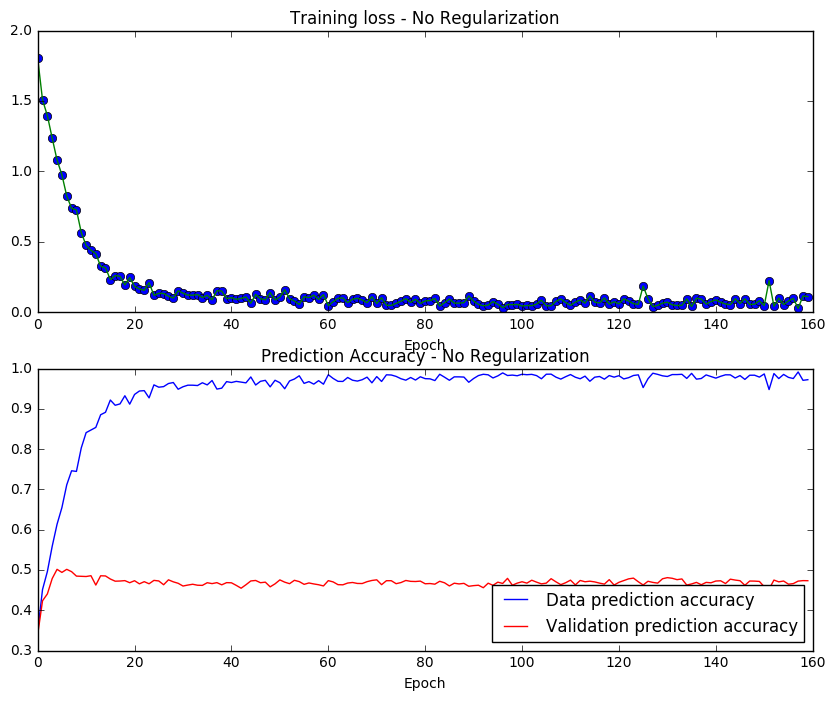

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.subplot(2,1,1)
plt.plot(loss_history_no_reg, 'o')
plt.plot(loss_history_no_reg)

plt.title('Training loss - No Regularization')
plt.xlabel('Epoch')

plt.subplot(2,1,2)
plt.plot(data_predict_acc_hist_no_reg,'b')
plt.plot(valid_predict_acc_hist_no_reg,'r')

plt.title('Prediction Accuracy - No Regularization')
plt.xlabel('Epoch')

plt.legend(['Data prediction accuracy' ,'Validation prediction accuracy'], loc=4)
plt.show()

### L2 Regularization: 2x CNN - Feature Extractor / 2x Fully Connected Layer / 1x Softmax Layer

In [113]:
# Workaround for layer naming
count_name = count_name + 1 
add_name = str(count_name)

# Convert to an array
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int64)
X_val = np.asarray(X_val, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.int64)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int64)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_val.shape', X_val.shape)
print('y_val.shape', y_val.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)
print('\n')

# Model declaration
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[batch_size, im_height, im_width, num_channels])   # [batch_size, height, width, channels]
y_ = tf.placeholder(tf.int64, shape=[batch_size, num_classes])
start_time = time.time()

network = tl.layers.InputLayer(x, name='input_layer_l2_'+str(add_name))
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, num_channels, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_1_l2_'+str(add_name))  
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, depth, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_2_l2_'+str(add_name))  
network = tl.layers.FlattenLayer(network, name='flatten_layer_l2_'+str(add_name))
network = tl.layers.DenseLayer(network, 
                              n_units=num_hidden1, act = tf.nn.relu, 
                              W_init=tf.truncated_normal_initializer(stddev=0.1),
                              name='relu_1_l2_'+str(add_name))
network = tl.layers.DenseLayer(network, 
                              n_units=num_hidden2, 
                              act = tf.nn.relu, 
                              W_init=tf.truncated_normal_initializer(stddev=0.1),
                              name='relu_2_l2_'+str(add_name))
network = tl.layers.DenseLayer(network, n_units=num_classes, 
                            act = tf.identity,
                            W_init=tf.truncated_normal_initializer(stddev=0.1),
                            name='output_layer_l2_'+str(add_name))   
y = network.outputs

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_)) # cost/loss function 
L2 = tf.contrib.layers.l2_regularizer(l2_reg)(network.all_params[4]) + \
                    tf.contrib.layers.l2_regularizer(l2_reg)(network.all_params[6])
cost = cost + L2
correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1)) # count correct predictions
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # accuracy


train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate_l2, beta1=beta1_adam, beta2=beta2_adam,
    epsilon=eps_adam, use_locking=False).minimize(cost, var_list=train_params) # Optimizer (adam)

sess.run(tf.global_variables_initializer()) # Start session
loss_history_l2_reg = np.zeros(n_epoch) # init for plots
data_predict_acc_hist_l2_reg = np.zeros(n_epoch)
valid_predict_acc_hist_l2_reg = np.zeros(n_epoch)

for epoch in range(n_epoch):
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): # Iterate over mini-batches
        feed_dict = {x: X_train_a, y_: y_train_a}
        sess.run(train_op, feed_dict=feed_dict)
    print('Epoch %d of %d' % (epoch + 1, n_epoch))
    train_loss, train_acc, n_batch = 0, 0, 0
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): 
        feed_dict = {x: X_train_a, y_: y_train_a}
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        train_loss += err; train_acc += ac; n_batch += 1
    loss_history_l2_reg[epoch] = train_loss/ n_batch
    data_predict_acc_hist_l2_reg[epoch] = train_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Training Loss:  %.3f" % (train_loss/ n_batch))
        print("Train Accuracy: %.3f\n" % (train_acc/ n_batch))
    val_loss, val_acc, n_batch = 0, 0, 0
    for X_val_a, y_val_a in tl.iterate.minibatches(
                                                    X_val, y_val, batch_size, shuffle=True): # Validate over mini-batches 
        feed_dict = {x: X_val_a, y_: y_val_a}
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        val_loss += err; val_acc += ac; n_batch += 1
    valid_predict_acc_hist_l2_reg[epoch] = val_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Validation Loss:     %.3f" % (val_loss/ n_batch))
        print("Validation Accuracy: %.3f\n" % (val_acc/ n_batch))

print('Test')
test_loss, test_acc, n_batch = 0, 0, 0
for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True): # Run test data
    feed_dict = {x: X_test_a, y_: y_test_a}
    err, ac = sess.run([cost, acc], feed_dict=feed_dict)
    test_loss += err; test_acc += ac; n_batch += 1
test_acc_l2_reg = test_acc/n_batch
print("Test Loss:     %.3f" % (test_loss/n_batch))
print("Test Accuracy: %.3f\n" % (test_acc/n_batch))

time_l2 = time.time() - start_time
print ('L2 Reg took %f\n' % time_l2)

## Save Network for Visualization
# L5
w = network.all_params[8].eval() # Done once per notebook
w_size = np.int(np.round(np.sqrt(w.shape[0])))
w_5_l2 = w.reshape(w_size, w_size, num_classes)

# L4
w = network.all_params[6].eval() # Done once per notebook
w_4_l2 = w.reshape(w.shape[0], w.shape[1])

# L3
w = network.all_params[4].eval() # Done once per notebook
w_3_l2 = w.reshape(w.shape[0], w.shape[1])

# L2
w = network.all_params[2].eval() # Done once per notebook
w_2_l2 = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])

# L1
w = network.all_params[0].eval() # Done once per notebook
w_1_l2 = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])


X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 10)
X_val.shape (5000, 32, 32, 3)
y_val.shape (5000, 10)
X_test.shape (5000, 32, 32, 3)
y_test.shape (5000, 10)


  tensorlayer:Instantiate InputLayer  input_layer_l2_32: (128, 32, 32, 3)
  tensorlayer:Instantiate Conv2dLayer cnn_layer_1_l2_32: [4, 4, 3, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate Conv2dLayer cnn_layer_2_l2_32: [4, 4, 12, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate FlattenLayer flatten_layer_l2_32: 768
  tensorlayer:Instantiate DenseLayer  relu_1_l2_32: 256, relu
  tensorlayer:Instantiate DenseLayer  relu_2_l2_32: 64, relu
  tensorlayer:Instantiate DenseLayer  output_layer_l2_32: 10, identity
Epoch 1 of 160
Epoch 2 of 160
Epoch 3 of 160
Epoch 4 of 160
Epoch 5 of 160
Epoch 6 of 160
Epoch 7 of 160
Epoch 8 of 160
Epoch 9 of 160
Epoch 10 of 160
Epoch 11 of 160
Epoch 12 of 160
Epoch 13 of 160
Epoch 14 of 160
Epoch 15 of 160
Epoch 16 of 160
Epoch 17 of 160
Epoch 18 of 160
Epoch 19 of 160
Epoch 20 

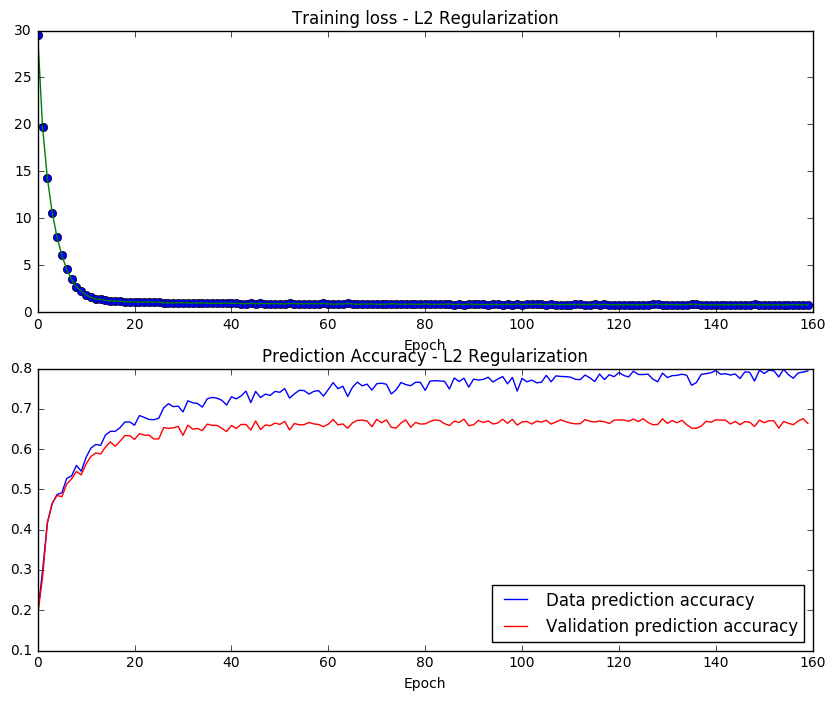

In [114]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.subplot(2,1,1)
plt.plot(loss_history_l2_reg, 'o')
plt.plot(loss_history_l2_reg)

plt.title('Training loss - L2 Regularization')
plt.xlabel('Epoch')

plt.subplot(2,1,2)
plt.plot(data_predict_acc_hist_l2_reg,'b')
plt.plot(valid_predict_acc_hist_l2_reg,'r')

plt.title('Prediction Accuracy - L2 Regularization')
plt.xlabel('Epoch')

plt.legend(['Data prediction accuracy' ,'Validation prediction accuracy'], loc=4)
plt.show()

###  Dropout: 2x CNN - Feature Extractor / 2x Fully Connected Layer / 1x Softmax Layer

In [120]:
# Workaround for layer naming
count_name = count_name + 1 
add_name = str(count_name)

# Convert to an array
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int64)
X_val = np.asarray(X_val, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.int64)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int64)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_val.shape', X_val.shape)
print('y_val.shape', y_val.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)
print('\n')

# Model declaration
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[batch_size, im_height, im_width, num_channels])   # [batch_size, height, width, channels]
y_ = tf.placeholder(tf.int64, shape=[batch_size, num_classes])
start_time = time.time()

network = tl.layers.InputLayer(x, name='input_layer_dropout_'+str(add_name))
network = tl.layers.Conv2dLayer(network,
                                act = tf.nn.relu,
                                W_init=tf.truncated_normal_initializer(stddev=0.1),
                                shape = [patch_size, patch_size, num_channels, depth],  
                                strides=[1, 2, 2, 1],
                                padding='SAME',
                                name='cnn_layer_1_dropout_'+str(add_name))  
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, depth, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_2_dropout_'+str(add_name))  
network = tl.layers.FlattenLayer(network, name='flatten_layer_dropout_'+str(add_name))
network = tl.layers.DropoutLayer(network, 
                                 keep = keep_prob, 
                                 name='dropout_relu_1_'+str(add_name))
network = tl.layers.DenseLayer(network, n_units=num_hidden1, 
                               act = tf.nn.relu,
                               W_init=tf.truncated_normal_initializer(stddev=0.1),
                               name='Dense_layer1_dropout_'+str(add_name))   
network = tl.layers.DropoutLayer(network, 
                                 keep = keep_prob, 
                                 name='dropout_relu_2_'+str(add_name))
network = tl.layers.DenseLayer(network, n_units=num_hidden2, 
                               act = tf.nn.relu,
                               W_init=tf.truncated_normal_initializer(stddev=0.1),
                               name='Dense_layer2_dropout_'+str(add_name))   
network = tl.layers.DenseLayer(network, n_units=num_classes, 
                               act = tf.identity,
                               W_init=tf.truncated_normal_initializer(stddev=0.1),
                               name='output_layer_dropout_'+str(add_name))   
y = network.outputs

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_)) # cost/loss function 

correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1)) # count correct predictions
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # accuracy


train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1_adam, beta2=beta2_adam,
    epsilon=eps_adam, use_locking=False).minimize(cost, var_list=train_params) # Optimizer (adam)

sess.run(tf.global_variables_initializer()) # Start session
loss_history_dropout = np.zeros(n_epoch) # init for plots
data_predict_acc_hist_dropout = np.zeros(n_epoch)
valid_predict_acc_hist_dropout = np.zeros(n_epoch)

for epoch in range(n_epoch):
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): # Iterate over mini-batches
        feed_dict = {x: X_train_a, y_: y_train_a}
        feed_dict.update( network.all_drop )        # Enable drop-out 
        sess.run(train_op, feed_dict=feed_dict)
    print('Epoch %d of %d' % (epoch + 1, n_epoch))
    train_loss, train_acc, n_batch = 0, 0, 0
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): 
        dp_dict = tl.utils.dict_to_one( network.all_drop )    
        feed_dict = {x: X_train_a, y_: y_train_a}
        feed_dict.update(dp_dict)
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        train_loss += err; train_acc += ac; n_batch += 1
    loss_history_dropout[epoch] = train_loss/ n_batch
    data_predict_acc_hist_dropout[epoch] = train_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Training Loss:  %.3f" % (train_loss/ n_batch))
        print("Train Accuracy: %.3f\n" % (train_acc/ n_batch))
    val_loss, val_acc, n_batch = 0, 0, 0
    for X_val_a, y_val_a in tl.iterate.minibatches(
                                                    X_val, y_val, batch_size, shuffle=True): # Validate over mini-batches 
        dp_dict = tl.utils.dict_to_one( network.all_drop )    
        feed_dict = {x: X_val_a, y_: y_val_a}
        feed_dict.update(dp_dict)
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        val_loss += err; val_acc += ac; n_batch += 1
    valid_predict_acc_hist_dropout[epoch] = val_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Validation Loss:     %.3f" % (val_loss/ n_batch))
        print("Validation Accuracy: %.3f\n" % (val_acc/ n_batch))

print('Test')
test_loss, test_acc, n_batch = 0, 0, 0
for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True): # Run test data
    dp_dict = tl.utils.dict_to_one( network.all_drop )    
    feed_dict = {x: X_test_a, y_: y_test_a}
    feed_dict.update(dp_dict)
    err, ac = sess.run([cost, acc], feed_dict=feed_dict)
    test_loss += err; test_acc += ac; n_batch += 1
test_acc_dropout = test_acc/n_batch
print("Test Loss:     %.3f" % (test_loss/n_batch))
print("Test Accuracy: %.3f\n" % (test_acc/n_batch))

time_dropout = time.time() - start_time
print ('Dropout took %f\n' % time_dropout)


## Save network for visualization
# L5
w = network.all_params[8].eval() # Done once per notebook
w_size = np.int(np.round(np.sqrt(w.shape[0])))
w_5_dropout = w.reshape(w_size, w_size, num_classes)

# L4
w = network.all_params[6].eval() # Done once per notebook
w_4_dropout = w.reshape(w.shape[0], w.shape[1])

# L3
w = network.all_params[4].eval() # Done once per notebook
w_3_dropout = w.reshape(w.shape[0], w.shape[1])

# L2
w = network.all_params[2].eval() # Done once per notebook
w_2_dropout = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])

# L1
w = network.all_params[0].eval() # Done once per notebook
w_1_dropout = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])


X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 10)
X_val.shape (5000, 32, 32, 3)
y_val.shape (5000, 10)
X_test.shape (5000, 32, 32, 3)
y_test.shape (5000, 10)


  tensorlayer:Instantiate InputLayer  input_layer_dropout_34: (128, 32, 32, 3)
  tensorlayer:Instantiate Conv2dLayer cnn_layer_1_dropout_34: [4, 4, 3, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate Conv2dLayer cnn_layer_2_dropout_34: [4, 4, 12, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate FlattenLayer flatten_layer_dropout_34: 768
  tensorlayer:Instantiate DropoutLayer dropout_relu_1_34: keep: 0.500000 is_fix: False
  tensorlayer:Instantiate DenseLayer  Dense_layer1_dropout_34: 256, relu
  tensorlayer:Instantiate DropoutLayer dropout_relu_2_34: keep: 0.500000 is_fix: False
  tensorlayer:Instantiate DenseLayer  Dense_layer2_dropout_34: 64, relu
  tensorlayer:Instantiate DenseLayer  output_layer_dropout_34: 10, identity
Epoch 1 of 160
Epoch 2 of 160
Epoch 3 of 160
Epoch 4 of 160
Epoch 5 of 160
Epoch 6 

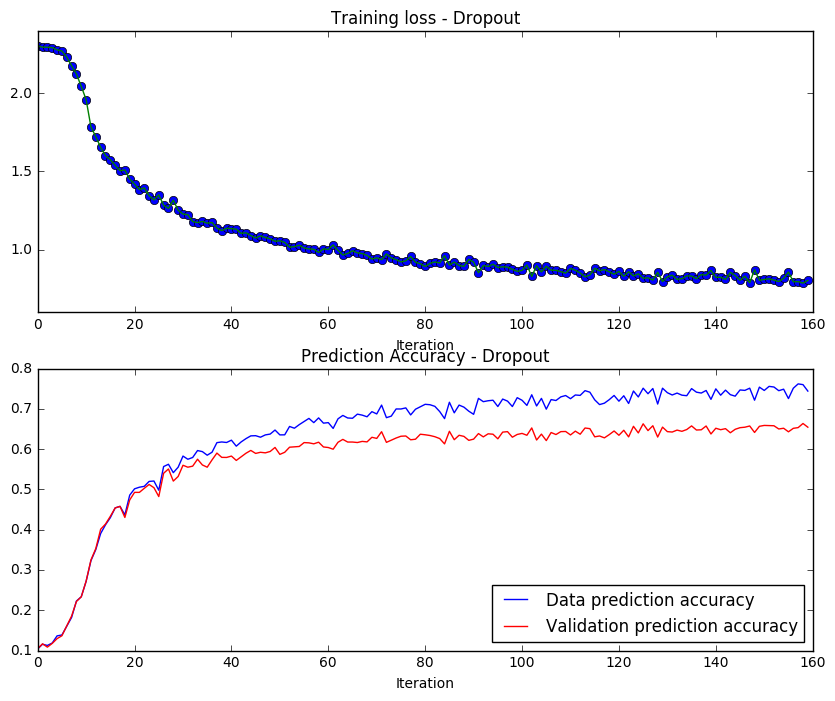

In [121]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.subplot(2,1,1)
plt.plot(loss_history_dropout, 'o')
plt.plot(loss_history_dropout)

plt.title('Training loss - Dropout')
plt.xlabel('Iteration')

plt.subplot(2,1,2)
plt.plot(data_predict_acc_hist_dropout,'b')
plt.plot(valid_predict_acc_hist_dropout,'r')

plt.title('Prediction Accuracy - Dropout')
plt.xlabel('Iteration')

plt.legend(['Data prediction accuracy' ,'Validation prediction accuracy'], loc = 4)
plt.show()


###  Drop-Connect: 2x CNN - Feature Extractor / 2x Fully Connected Layer / 1x Softmax Layer


In [127]:
# Workaround for layer naming
count_name = count_name + 1 
add_name = str(count_name)

# Convert to an array
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int64)
X_val = np.asarray(X_val, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.int64)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int64)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_val.shape', X_val.shape)
print('y_val.shape', y_val.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)
print('\n')

# Model declaration
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[batch_size, im_height, im_width, num_channels])   # [batch_size, height, width, channels]
y_ = tf.placeholder(tf.int64, shape=[batch_size, num_classes])
start_time = time.time()

network = tl.layers.InputLayer(x, name='input_layer_dropcon_'+str(add_name))
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, num_channels, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_1_dropcon_'+str(add_name))  
network = tl.layers.Conv2dLayer(network,
                       act = tf.nn.relu,
                       W_init=tf.truncated_normal_initializer(stddev=0.1),
                       shape = [patch_size, patch_size, depth, depth],  
                       strides=[1, 2, 2, 1],
                       padding='SAME',
                       name='cnn_layer_2_dropcon_'+str(add_name))  
network = tl.layers.FlattenLayer(network, name='flatten_layer_dropcon_'+str(add_name))
network = tl.layers.DropconnectDenseLayer(network, 
                                          keep = keep_prob, 
                                          n_units=num_hidden1, act = tf.nn.relu, 
                                          W_init=tf.truncated_normal_initializer(stddev=0.1),
                                          name='dropconnect_relu_1_dropcon_'+str(add_name))
network = tl.layers.DropconnectDenseLayer(network, 
                                          keep = keep_prob, 
                                          n_units=num_hidden2, 
                                          act = tf.nn.relu, 
                                          W_init=tf.truncated_normal_initializer(stddev=0.1),
                                          name='dropconnect_relu_2_dropcon_'+str(add_name))
network = tl.layers.DenseLayer(network, n_units=num_classes, 
                            act = tf.identity,
                            W_init=tf.truncated_normal_initializer(stddev=0.1),
                            name='output_layer_dropcon_'+str(add_name))   
y = network.outputs

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_)) # cost/loss function 

correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1)) # count correct predictions
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # accuracy


train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1_adam, beta2=beta2_adam,
    epsilon=eps_adam, use_locking=False).minimize(cost, var_list=train_params) # Optimizer (adam)

sess.run(tf.global_variables_initializer()) # Start session
loss_history_dropcon = np.zeros(n_epoch) # init for plots
data_predict_acc_hist_dropcon = np.zeros(n_epoch)
valid_predict_acc_hist_dropcon = np.zeros(n_epoch)

for epoch in range(n_epoch):
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): # Iterate over mini-batches
        feed_dict = {x: X_train_a, y_: y_train_a}
        feed_dict.update( network.all_drop )        # Enable drop-connect 
        sess.run(train_op, feed_dict=feed_dict)
    print('Epoch %d of %d' % (epoch + 1, n_epoch))
    train_loss, train_acc, n_batch = 0, 0, 0
    for X_train_a, y_train_a in tl.iterate.minibatches(
                                                        X_train, y_train, batch_size, 
                                                        shuffle=True): 
        dp_dict = tl.utils.dict_to_one( network.all_drop )    
        feed_dict = {x: X_train_a, y_: y_train_a}
        feed_dict.update(dp_dict)
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        train_loss += err; train_acc += ac; n_batch += 1
    loss_history_dropcon[epoch] = train_loss/ n_batch
    data_predict_acc_hist_dropcon[epoch] = train_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Training Loss:  %.3f" % (train_loss/ n_batch))
        print("Train Accuracy: %.3f\n" % (train_acc/ n_batch))
    val_loss, val_acc, n_batch = 0, 0, 0
    for X_val_a, y_val_a in tl.iterate.minibatches(
                                                    X_val, y_val, batch_size, shuffle=True): # Validate over mini-batches 
        dp_dict = tl.utils.dict_to_one( network.all_drop )    
        feed_dict = {x: X_val_a, y_: y_val_a}
        feed_dict.update(dp_dict)
        err, ac = sess.run([cost, acc], feed_dict=feed_dict)
        val_loss += err; val_acc += ac; n_batch += 1
    valid_predict_acc_hist_dropcon[epoch] = val_acc/ n_batch
    if (epoch + 1) % print_freq == 0: 
        print("Validation Loss:     %.3f" % (val_loss/ n_batch))
        print("Validation Accuracy: %.3f\n" % (val_acc/ n_batch))

print('Test')
test_loss, test_acc, n_batch = 0, 0, 0
for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True): # Run test data
    dp_dict = tl.utils.dict_to_one( network.all_drop )    
    feed_dict = {x: X_test_a, y_: y_test_a}
    feed_dict.update(dp_dict)
    err, ac = sess.run([cost, acc], feed_dict=feed_dict)
    test_loss += err; test_acc += ac; n_batch += 1
test_acc_dropcon = test_acc/n_batch
print("Test Loss:     %.3f" % (test_loss/n_batch))
print("Test Accuracy: %.3f\n" % (test_acc/n_batch))

time_dropcon = time.time() - start_time
print ('Drop-Connect took %f\n' % time_dropcon)

## Save network for visualization
# L5
w = network.all_params[8].eval() # Done once per notebook
w_size = np.int(np.round(np.sqrt(w.shape[0])))
w_5_dropcon = w.reshape(w_size, w_size, num_classes)

# L4
w = network.all_params[6].eval() # Done once per notebook
w_4_dropcon = w.reshape(w.shape[0], w.shape[1])

# L3
w = network.all_params[4].eval() # Done once per notebook
w_3_dropcon = w.reshape(w.shape[0], w.shape[1])

# L2
w = network.all_params[2].eval() # Done once per notebook
w_2_dropcon = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])

# L1
w = network.all_params[0].eval() # Done once per notebook
w_1_dropcon = w.reshape(w.shape[0], w.shape[1], w.shape[2], w.shape[3])


X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 10)
X_val.shape (5000, 32, 32, 3)
y_val.shape (5000, 10)
X_test.shape (5000, 32, 32, 3)
y_test.shape (5000, 10)


  tensorlayer:Instantiate InputLayer  input_layer_dropcon_36: (128, 32, 32, 3)
  tensorlayer:Instantiate Conv2dLayer cnn_layer_1_dropcon_36: [4, 4, 3, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate Conv2dLayer cnn_layer_2_dropcon_36: [4, 4, 12, 12], [1, 2, 2, 1], SAME, relu
  tensorlayer:Instantiate FlattenLayer flatten_layer_dropcon_36: 768
  tensorlayer:Instantiate DropconnectDenseLayer dropconnect_relu_1_dropcon_36: 256, relu
  tensorlayer:Instantiate DropconnectDenseLayer dropconnect_relu_2_dropcon_36: 64, relu
  tensorlayer:Instantiate DenseLayer  output_layer_dropcon_36: 10, identity
Epoch 1 of 160
Epoch 2 of 160
Epoch 3 of 160
Epoch 4 of 160
Epoch 5 of 160
Epoch 6 of 160
Epoch 7 of 160
Epoch 8 of 160
Epoch 9 of 160
Epoch 10 of 160
Epoch 11 of 160
Epoch 12 of 160
Epoch 13 of 160
Epoch 14 of 160
Epoch 15 o

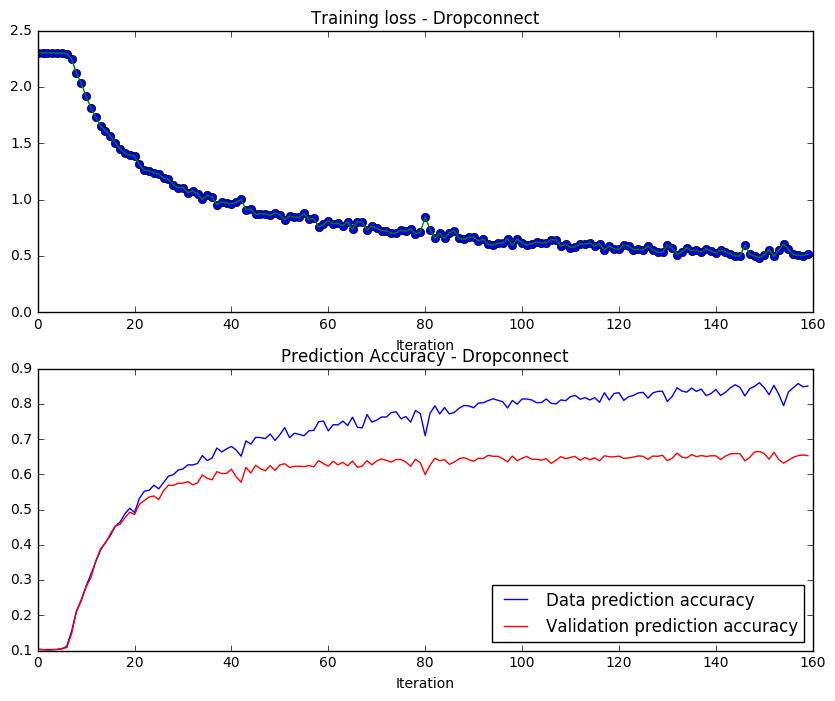

In [128]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.subplot(2,1,1)
plt.plot(loss_history_dropcon, 'o')
plt.plot(loss_history_dropcon)

plt.title('Training loss - Dropconnect')
plt.xlabel('Iteration')

plt.subplot(2,1,2)
plt.plot(data_predict_acc_hist_dropcon,'b')
plt.plot(valid_predict_acc_hist_dropcon,'r')

plt.title('Prediction Accuracy - Dropconnect')
plt.xlabel('Iteration')

plt.legend(['Data prediction accuracy' ,'Validation prediction accuracy'], loc = 4)
plt.show()